In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path ="C:\\Users\\Ulysse\\Desktop\\Projets persos + Dashboards\\Datasets\\bbc-news-data.csv"
df = pd.read_csv(file_path, sep='\t')

display(df.head())

print(df.info())

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   filename  2225 non-null   object
 2   title     2225 non-null   object
 3   content   2225 non-null   object
dtypes: object(4)
memory usage: 69.7+ KB
None


In [2]:
df['title_length'] = df['title'].apply(len)
print(df['title_length'].describe())

df['content_length'] = df['content'].apply(len)
print(df['content_length'].describe())

# Simple curiosité

#Just curious.

count    2225.000000
mean       31.367191
std         2.605422
min        16.000000
25%        31.000000
50%        32.000000
75%        33.000000
max        52.000000
Name: title_length, dtype: float64
count     2225.000000
mean      2232.793258
std       1364.249946
min        471.000000
25%       1414.000000
50%       1936.000000
75%       2774.000000
max      25454.000000
Name: content_length, dtype: float64


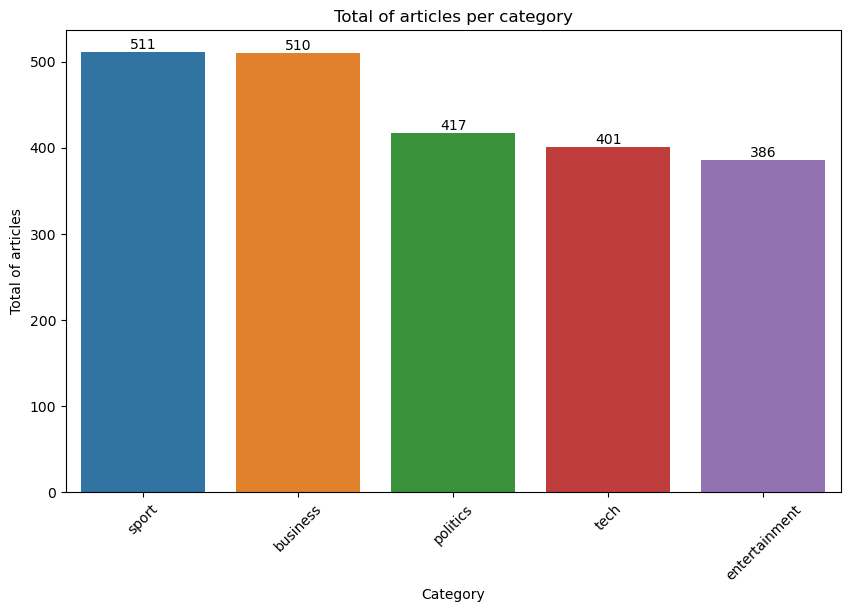

In [3]:
c_counter = df['category'].value_counts()

plt.figure(figsize=(10,6))
ax = sns.barplot(x=c_counter.index, y=c_counter.values)
plt.title("Total d'articles par catégorie / Total of articles per category")
plt.xlabel("Catégorie / Category")
plt.ylabel("Total d'articles / Total of articles")
plt.xticks(rotation=45)

for i in ax.containers:
    ax.bar_label(i)
    
plt.show()

In [4]:
dup_title = df[df.duplicated(subset=['title'])]
print(f"Nombre de titres dupliqués / Number of duplicated titles : {dup_title.shape[0]}")

dup_content = df[df.duplicated(subset=['content'])]
print(f"Nombre de contenus dupliqués / Number of duplicated contents : {dup_content.shape[0]}")

Number of duplicated titles : 129
Number of duplicated contents : 133


In [5]:
pd.set_option('display.max_colwidth', None)

dup_title = df[df.duplicated(subset='title', keep=False)]
display(dup_title[['title','content']])

dup_content = df[df.duplicated(subset='content', keep=False)]
display(dup_content[['title','content']])

title  \
6       Jobs growth still slow in the US   
213    Economy 'strong' in election year   
214      SEC to rethink post-Enron rules   
239    Economy 'strong' in election year   
252     Jobs growth still slow in the US   
...                                  ...   
2211      Camera phones are 'must-haves'   
2212  Mobile multimedia slow to catch on   
2214    Peer-to-peer nets 'here to stay'   
2216    Savvy searchers fail to spot ads   
2221     Spam e-mails tempt net shoppers   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

,title,content
6,Jobs growth still slow in the US,"The US created fewer jobs than expected in January, but a fall in jobseekers pushed the unemployment rate to its lowest level in three years. According to Labor Department figures, US firms added only 146,000 jobs in January. The gain in non-farm payrolls was below market expectations of 190,000 new jobs. Nevertheless it was enough to push down the unemployment rate to 5.2%, its lowest level since September 2001. The job gains mean that President Bush can celebrate - albeit by a very fine margin - a net growth in jobs in the US economy in his first term in office. He presided over a net fall in jobs up to last November's Presidential election - the first President to do so since Herbert Hoover. As a result, job creation became a key issue in last year's election. However, when adding December and January's figures, the administration's first term jobs record ended in positive territory. The Labor Department also said it had revised down the jobs gains in December 2004, from 157,000 to 133,000. Analysts said the growth in new jobs was not as strong as could be expected given the favourable economic conditions. ""It suggests that employment is continuing to expand at a moderate pace,"" said Rick Egelton, deputy chief economist at BMO Financial Group. ""We are not getting the boost to employment that we would have got given the low value of the dollar and the still relatively low interest rate environment."" ""The economy is producing a moderate but not a satisfying amount of job growth,"" said Ken Mayland, president of ClearView Economics. ""That means there are a limited number of new opportunities for workers."""
213,Economy 'strong' in election year,"UK businesses are set to prosper during the next few months - but this could trigger more interest rate rises, according to a report. Optimism is at its highest since 1997 and business will reap the benefits of a continuing rise in public spending, say researchers at BDO Stoy Hayward. The Bank of England is expected to keep rates on hold this week - but they could go up later in the year. Rates are likely to rise after the anticipated general election in May. The BDO optimism index - a leading indicator of GDP growth two quarters ahead edged up in January to 102.5, from 102.2 in October. The rise is due, in part, to an increase in public spending and increased merger and acquisition activity. The only thing blighting business optimism this year will be uncertainties associated with the general election, BDO said. Its BDO's output index - which predicts GDP movements a quarter in advance - remained at 100.8 for January, implying GDP growth at 2.9% in the second quarter of 2005. However, the output index is being held back by recent interest rate rises, sterling's strength against the dollar and high oil prices, the group noted. Its inflation index, which has risen continuously over the last 8 months, climbed to 110.0 in January from 108.0 in October last year. ""The UK is looking strong going into the general election, but businesses need to prepare themselves for a jolt ahead as the Bank of England reacts to growth and inflationary pressures,"" said Peter Hemington, partner at BDO Stoy Hayward. ""Growth will probably slow by the end of 2005 and it is likely that we will see higher interest rates or a sharp drop in demand for products and services."""
214,SEC to rethink post-Enron rules,"The US stock market watchdog's chairman has said he is willing to soften tough new US corporate governance rules to ease the burden on foreign firms. In a speech at the London School of Economics, William Donaldson promised ""several initiatives"". European firms have protested that US laws introduced after the Enron scandal make Wall Street listings too costly. The US regulator said foreign firms may get extra time to comply with a key clause in the Sarbanes-Oxley Act. The Act comes into force in mid-2005. It obliges all firms with US stock marke

In [6]:
df_clean = df.drop_duplicates(subset='content', keep='first')

print(f"Nombre de lignes avant suppression / Number of rows before deletion : {df.shape[0]}")
print(f"Nombre de lignes après suppression des doublons / Number of rows after deletion : {df_clean.shape[0]}")

print(f"\nLe total de doublons supprimés représentait 6% du dataset.")
print(f"The total number of duplicates removed represented 6% of the dataset.")

Nombre de lignes avant suppression : 2225
Nombre de lignes après suppression des doublons : 2092

Le total de doublons supprimés représentait 6% du dataset.
The total number of duplicates removed represented 6% of the dataset.


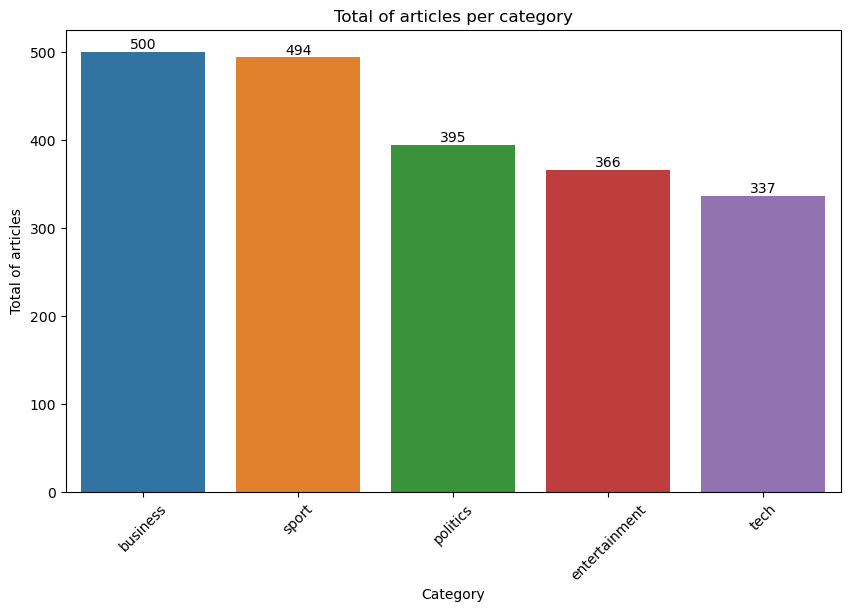

In [7]:
df = df_clean 

c_counter = df['category'].value_counts()

plt.figure(figsize=(10,6))
ax = sns.barplot(x=c_counter.index, y=c_counter.values)
plt.title("Nombre d'articles par catégories / Total of articles per category")
plt.xlabel("Catégorie / Category")
plt.ylabel("Total d'articles / Total of articles")
plt.xticks(rotation=45)

for i in ax.containers:
    ax.bar_label(i)
    
plt.show()

In [8]:
for category in df['category'].unique():
    print(f"Articles dans la catégorie {category} / Articles in the {category} category :")
    display(df[df['category'] == category].sample(3)[['title', 'content']])
    print("\n")

Articles dans la catégorie business / Articles in the business category :


,title,content
424,Nortel in $300m profit revision,"Telecoms equipment maker Nortel Networks has sharply revised downwards its profits for the 2003 fiscal year. In a long-awaited filing, Nortel said it had made $434m (£231m), compared to the previously reported $732m. But the figures - revised after an audit which led to the sacking of the Canadian firm's chief - showed revenue was about 4% higher than first thought. Nortel shares, which have lost nearly 50% of their value since last year, climbed 1.46% in Toronto on Tuesday. Nortel's head Frank Dunn and two other executives were fired in January last year after the company announced it had conducted the internal audit. Securities and police authorities in both the US and Canada are still conducting inquiries into the accounts. Nortel also issued new figures for the 2001-2002 period, which they had previously indicated had understated losses. ""With the completion of our restatements we have a solid foundation on which to move forward with our business,"" said Nortel president and chief executive Bill Owens. ""The restatement has been a monumental task, both complex and demanding."" The company also said 12 senior executives - none of whom were involved directly in the accounting of the revised figures - have voluntarily agreed to repay to bonuses awarded in 2003 totalling $8.6m. Nortel added: ""these members of the core executive team share the board's deep disappointment over the circumstances that led to the restatement."""
441,Lesotho textile workers lose jobs,"Six foreign-owned textile factories have closed in Lesotho, leaving 6,650 garment workers jobless, union officers told the AP news agency. Factory Workers Union secretary general Billy Macaefa blamed the closures on the end of worldwide textile quotas. The quotas for developing nations, ended on 1 January, gave them a set share of the rich countries' markets. They also limited the amount countries like China could export to the big markets of the United States and EU. ""We understand that some (owners)... were complaining that the South African rand was strong against the US dollar, and they were losing when exporting textiles and clothing to the United States,"" Mr Macaefa said at a news briefing in the capital, Maseru. Lesotho's currency, the maloti, is fixed to the rand. ""But we suspect that they left the country unceremoniously because of the end of quotas introduced by the World Trade Organization."" He said the six factories were Leisure Garments, Modern Garments, Precious Six Garments, TW Garments, Lesotho Hats and Vogue Landmark. The owners - two from Taiwan, two from China, one from Mauritius and one from Malaysia - left over the December holiday period without informing or paying their employees, he said. Union leaders and trade campaigners have been warning that developing nations such as Lesotho, Sri Lanka, and Bangaldesh could lose thousands of jobs once the quotas were lifted. In the mountainous country surrounded by South Africa, it is feared as many as 50,000 textile workers could lose their jobs, and Mr Mafeca said he expected more companies to leave. The assistance of a US law had given Lesotho's textiles duty-free access to North American markets. The African Growth and Opportunity Act (AGOA), gave sub-Saharan countries preferential access to the US market for apparel and textile products as well as a wide range of other goods. A Lesotho government news briefing is expected on Wednesday."
481,Businesses fail to plan for HIV,"Companies fail to draw up plans to cope with HIV/Aids until it affects 20% of people in a country, new research says. The finding comes in a report published on Thursday by the World Economic Forum, Harvard and the UN aids agency. ""Too few companies are responding proactively to the social and business threats,"" said Dr Kate Taylor, head of the WEF's global Health Initiative. Nearly 9,000 business leaders in 104 countries were surveyed for Business and HIV/AIDS: Commitment 



Articles dans la catégorie entertainment / Articles in the entertainment category :


,title,content
826,Patti Smith to host arts festival,"Rock star Patti Smith has been made artistic director of this year's Meltdown festival, to be held at London's South Bank Centre in June. The punk pioneer follows Morrissey, David Bowie and Nick Cave in directing 15 days of concerts and events. Smith has yet to decide the line-up for Meltdown, which begins on 11 June. ""I want to touch on all aspects of our culture, perhaps with readings from Genet, and I have an idea for Jeremy Irons to read Proust,"" she said. The 58-year-old US singer of Because the Night told The Observer newspaper that the festival would be her response to these ""material, exploitative and greedy times"". ""It is important we explore the new, but we should also salute the best art there is, aesthetically and spiritually,"" she said. Last year's Meltdown festival, directed by the ex-Smiths star Morrissey, included appearances by singer Jane Birkin, Nancy Sinatra and playwright Alan Bennett. He also persuaded punk band The New York Dolls to reform for a reunion show."
890,Lost Doors frontman movie found,"Historians in Florida have discovered a 40-year-old clip of a clean-cut Jim Morrison appearing in a promotional film for his university. The 1964 film shows the Doors frontman, who died aged 27 in 1971, playing the part of a young man who had been rejected by Florida State University. Morrison is seen quizzing a college administrator on why he was refused. ""But what happened? How come my parents and the state and the university didn't look ahead?"" he is seen asking. ""It's incredible. He's so clean cut and soft-spoken,"" said Florida state archivist Jody Norman. ""We know he was at Florida State University for a period of time and he did some acting when he was there,"" Norman added. The Doors were one of the most influential bands of the 1960s, with hits including Light My Fire and Riders On The Storm. Morrison was notorious for his wild lifestyle - and was accused of exposing himself and simulating a sex act at a Miami concert in 1969. He was found dead in the bath of his Paris apartment and died from heart problems, aggravated by alcohol. A coroner recorded a verdict of death by natural causes and his grave at the city's Pere Lachaise ceremony has become a shrine for fans."
712,Greer attacks 'bully' Big Brother,"Germaine Greer has criticised Celebrity Big Brother's ""bullying"" of housemates after quitting the reality TV show. She said ""superior"" bullying tactics, like making housemates cold and hungry, could encourage playground bullying. She also condemned the ""complete irresponsibility"" of adding Brigitte Nielsen's former mother-in-law Jackie Stallone to the house on Monday. Nielsen had panicked that if she reacted badly it could harm her access to her children, Greer said. The feminist writer and broadcaster said Big Brother had behaved ""like a child rather than a parent"" by taunting contestant John McCririck after denying him a cola drink. ""I thought it was actually demonstrating the role of taunting in the playground and there are so many children whose lives have actually been destroyed by taunting in the playground,"" Greer said. She also said that her fellow housemates had publicity-seeking ""agendas"". ""I had no idea who would be in here and it's wrong for me to present myself in the same context as they are."" Media observers had been surprised by Greer's initial decision to join the third celebrity version of the Channel 4 reality TV show, given that she has written critical articles about the format in the past. As she packed her suitcase to leave the house she told fellow housemates: ""I'm leaving over specific issues, but best for everyone if I don't discuss them. ""I have a problem with decisions, I make them fast and when I make them, I stick to them."" Greer had earlier failed to persuade other contestants to stage a naked protest against Big Brother. Other celebrities to walk out of a reality show TV include Sex Pistol Jo



Articles dans la catégorie politics / Articles in the politics category :


,title,content
1279,Terror suspects face house arrest,"UK citizens suspected of involvement in terrorism could face house arrest as part of a series of new measures outlined by the home secretary. It comes after law lords ruled that the detention of 12 foreign terror suspects without trial breached human rights. Charles Clarke's planned ""control orders"" mean anyone suspected of being involved in terrorism could be subject to house arrest, curfews or tagging. The Law Society dubbed Mr Clarke's new proposals an ""abuse of power"". Deals are already being sought to deport some of the foreign detainees who are mainly held in Belmarsh Prison in London under the current laws introduced after the US terror attacks on 11 September 2001. Mr Clarke said efforts would continue to deport them to their countries of origin Algeria, Tunisia, Egypt and Jordan without them facing torture or death. Under the proposed changes - prompted by the House of Lords ruling - the home secretary could order British citizens or foreign suspects who could not be deported, to face house arrest or other measures such as restrictions on their movements or limits on their use of telephones and the internet. British citizens are being included in the changes after the law lords said the current powers were discriminatory because they could only be used on foreign suspects. Mr Clarke also said intelligence reports showed some British nationals were now playing a more significant role in terror threats. Human rights lawyer Clive Stafford-Smith said the plans were a ""further abuse of human rights in Britain"". Mr Clarke said prosecutions were the government's first preference and promised the powers would only be used in ""serious"" cases, with independent scrutiny from judges. He told MPs: ""There remains a public emergency threatening the life of the nation."" He accepted the law lords' ruling but argued detention powers had helped prevent attacks and deter terrorists. The current detainees would not be freed until the new powers were in place as they were still considered a national security threat, he told MPs. There have been calls for the rules for wire-tap and intercept evidence to be allowed to be used in courts but Mr Clarke refused to back that change. He said intercept evidence was only a small part of the case against the men and some of it could not be used because it could put sources' lives at risk. Most of the terror suspects are being held indefinitely at Belmarsh prison, in London. Conservative shadow home secretary David Davis was worried about extending special powers to cover British citizens. He warned: ""Throughout history, internment has generally backfired because of the resentment it creates. ""So unless the process is clearly just, the home secretary could find himself confining one known terrorist only to recruit 10 unknown terrorists."" He suggested changing the law to let security-cleared judges view evidence gathered by phone-tapping could allow more terror cases to come to court. Liberal Democrat spokesman Mark Oaten also backed use of wire-tap evidence. He said the standard of proof for the new powers would have to be ""very high indeed"" and he asked whether ministers had looked at measures which fitted with human rights laws. Shami Chakrabarti, from human rights group Liberty, joined calls for intercept evidence to be allowed in trials. She said: ""Adherence to the rule of law should not be a game of cat and mouse. The government should not swap one human rights 'opt out' for another."""
1274,Election 'could be terror target',"Terrorists might try to target the UK in the run-up to the election, London's most senior police officer has said. Sir Ian Blair said terror groups would remember the effect of the Madrid bomb on Spain's general election last year. Other potential targets were the royal wedding and the UK's presidency of the European Union and G8, he said. He refused to say if there was specific information about the risk



Articles dans la catégorie sport / Articles in the sport category :


,title,content
1612,Bell set for England debut,"Bath prop Duncan Bell has been added to England's 30-man squad to face Ireland in the RBS Six Nations. And with Phil Vickery sidelined for at least six weeks with a broken arm and Julian White out with a neck injury, Bell could make his England debut. Bell, 30, had set his sights on an international career with Wales. But last December, the International Rugby Board confirmed that he could only be eligible for England as he had travelled on tour with them in 1998. England coach Andy Robinson could take a gamble and call inexperienced Sale Sharks prop Andrew Sheridan into his front row. But Sheridan favours the loosehead side of the scrum and a more likely scenario is for uncapped Bell - who was among the tryscorers when England A beat France A 30-20 nine days ago - to be drafted in. Robinson also has an injury worry over centre Olly Barkley, who withdrew from Bath's starting line-up to face Gloucester last weekend. He was due to have a hospital scan on Monday, while Gloucester centre Henry Paul, who started at fly-half against Bath, limped out at Kingsholm because of an ankle problem. Despite Barkley's three missed penalties in the 18-17 defeat against France, he is expected to retain his place at inside centre, although Leicester's in-form prospect Ollie Smith would be an obvious replacement. Bath coach John Connolly rates Barkley as no better than a 50/50 chance to make the Dublin trip. Uncapped fly-half Andy Goode has been named in a 30-man training squad for the Ireland game, and he strengthened his selection claims by kicking 28 points during Leicester's record 83-10 win against Newcastle on Sunday. England's players are due to meet at their Surrey training base on Monday."
1469,Wenger dejected as Arsenal slump,"Arsenal manager Arsene Wenger claimed their display in the 3-1 defeat against Bayern Munich was ""our worst peformance in the Champions League"". Kolo Toure's late goal gives the Gunners hope for the second leg, but Wenger said: ""The only positive is that we are still in the tie. ""The players are really down in the dressing-room. I feel we really turned in a bad performance. ""At 3-0 we faced a real struggle, but 3-1 at least gives us a chance."" Goalscorer Toure was also at fault for two goals, and Wenger said: ""We need to help Toure rebuild his confidence as he is low at the moment."" Wenger also tried to stay upbeat himself, adding: ""But there is enough time for crying. I could cry - maybe it would be easier - but life goes on. ""In this job, you have good and bad nights. This was a bad night - but I still have confidence in the quality of my players, as well as their spirit and desire."" But Wenger's Bayern counterpart Felix Magath was in no mood to celebrate either. He said: ""I am far from happy despite the win. My players failed to try and score a fourth to kill the tie and then conceded the late goal. ""Arsenal are fully capable of scoring several goals against us on their own turf."" Arsenal keeper Jens Lehmann, whose personal rivalry with Bayern goalkeeper Oliver Kahn was not helped by the result, said: ""Do I blame myself for the third goal? As a goalkeeper, I always blame myself. ""I just know the goals were very easy against us. In my time here, we have never conceded three easy goals like that - but sometimes it happens. ""It would have been impossible to go through at 3-0 - but with the goal we have chances. Everything is now possible."""
1318,Isinbayeva claims new world best,"Pole vaulter Yelena Isinbayeva broke her own indoor world record by clearing 4.89 metres in Lievin on Saturday. It was the Russian's 12th world record of her career and came just a few days after she cleared 4.88m at the Norwich Union Grand Prix in Birmingham. The Olympic champion went on to attempt 5.05m at the meeting on France but failed to clear that height. In the men's 60m, former Olympic 100m champion Maurice Greene could only finish second to Leonard Scott. It was Gre



Articles dans la catégorie tech / Articles in the tech category :


title  \
1861  Movie body hits peer-to-peer nets   
1953     Slim PlayStation triples sales   
2187     'Podcasters' look to net money   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

C:\Users\Ulysse\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ulysse\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ulysse\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ulysse\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

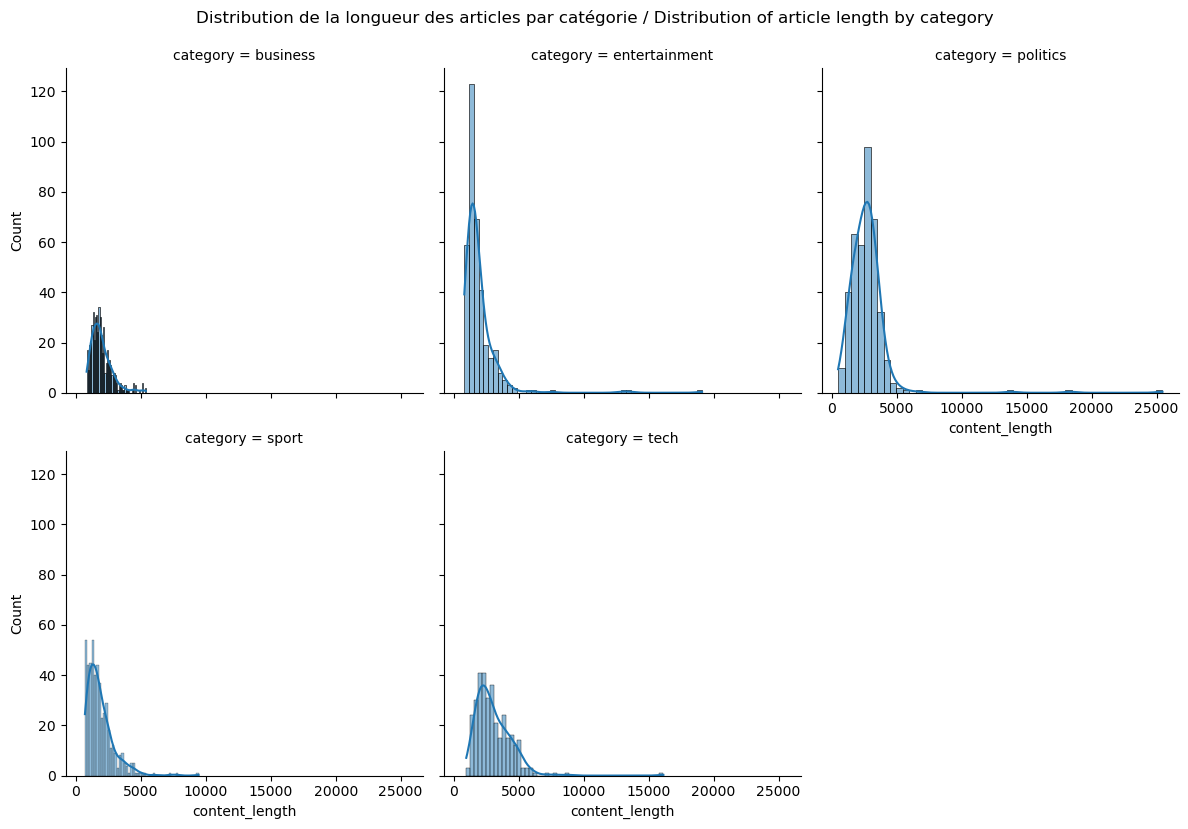

C:\Users\Ulysse\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


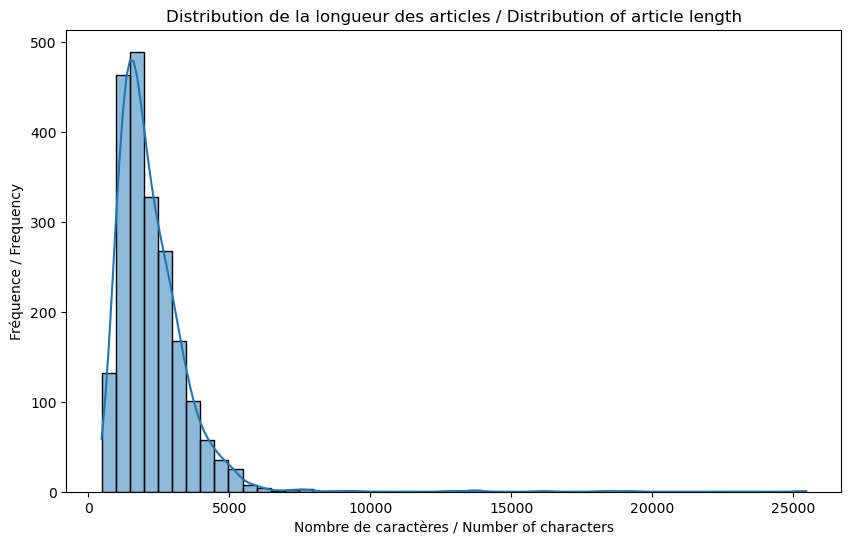

In [9]:
g = sns.FacetGrid(df, col="category", col_wrap=3, height=4)

g.map(sns.histplot, "content_length", bins=50, kde=True)

g.fig.suptitle("Distribution de la longueur des articles par catégorie / Distribution of article length by category", y=1.03)

plt.show()

plt.figure(figsize=(10,6))
sns.histplot(df['content_length'], bins=50, kde=True)
plt.title("Distribution de la longueur des articles / Distribution of article length")
plt.xlabel("Nombre de caractères / Number of characters")
plt.ylabel("Fréquence / Frequency")
plt.show()

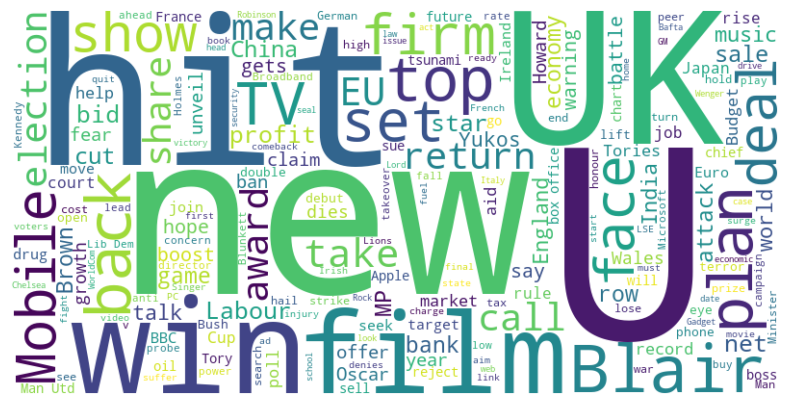

In [10]:
from wordcloud import WordCloud

title_text = " ".join(df['title'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(title_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
import string
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def cl_text(text):
    text = text.lower()
    text = "".join([char for char in text if char not in string.punctuation])  # Supprimer la ponctuation
    text = " ".join([word for word in text.split() if word not in stop_words])  # Supprimer les stopwords
    return text

df['cl_content'] = df['content'].apply(cl_text)

X = df['cl_content']
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ulysse\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9832935560859188
               precision    recall  f1-score   support

     business       0.98      0.98      0.98       105
entertainment       0.99      0.99      0.99        74
     politics       0.99      0.97      0.98        71
        sport       1.00      1.00      1.00       101
         tech       0.96      0.97      0.96        68

     accuracy                           0.98       419
    macro avg       0.98      0.98      0.98       419
 weighted avg       0.98      0.98      0.98       419



In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np
import spacy

nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if not token.is_stop])

df['processed_content'] = df['content'].apply(preprocess)

vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(df['processed_content'])

model = LogisticRegression(max_iter=1000)
cv_scores = cross_val_score(model, X_vectorized, y, cv=5, scoring='accuracy')

print("Scores de la cross-validation pour chaque pli / Cross-validation scores for every fold:", cv_scores)
print("Moyenne de l'accuracy / Accuracy mean :", np.mean(cv_scores))

Scores de la cross-validation pour chaque pli: [0.9451074  0.94988067 0.92105263 0.98086124 0.98564593]
Moyenne de l'accuracy: 0.9565095750876431


In [22]:
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

num_topics = 20
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42, max_iter=10)
lda_model.fit(X_vectorized)

feature_names = vectorizer.get_feature_names_out()
n_top_words = 10 

for topic_idx, topic in enumerate(lda_model.components_):
    print(f"Topic {topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

topics_for_documents = lda_model.transform(X_vectorized)

Topic 0:
glazer gm peston fannie mae barclays stern santini prescott mcmanus
Topic 1:
domain refugee guantanamo mubanga cuba noon migrant tuc fiji connor
Topic 2:
chepkemei marathon radcliffe drogba gudjohnsen lampard duff gallas desailly paula
Topic 3:
hd plane boeing blu hdtv ethnic easterby airlines airways delta
Topic 4:
win play game england good match player team final wales
Topic 5:
balls lvmh lomu falic boeing peoplesoft 7e7 rossignol guerrouj registry
Topic 6:
southampton hoddle wright redknapp kronor heinze carnival cairn mcilroy forensic
Topic 7:
lycos godzilla nortel tremor hsdpa absa chester hewitt cocoa viacom
Topic 8:
ds nintendo handheld sullivan psp driscoll p2p safin console ulster
Topic 9:
villa tobacco francis parmalat lewis gardener 1500 prix norwich greene
Topic 10:
sullivan animal yahoo regiment blackpool gervais ict hailey sina bening
Topic 11:
mci goldsmith juninho verizon stade qwest yachvili toulousain edu biarritz
Topic 12:
kenteris thanou iaaf greek test dr

In [23]:
dominant_topic_per_doc = np.argmax(topics_for_documents, axis=1)

for i in range(10):
    print(f"Document {i}: Topic {dominant_topic_per_doc[i]}")

Document 0: Topic 15
Document 1: Topic 15
Document 2: Topic 15
Document 3: Topic 15
Document 4: Topic 19
Document 5: Topic 15
Document 6: Topic 15
Document 7: Topic 15
Document 8: Topic 15
Document 9: Topic 15


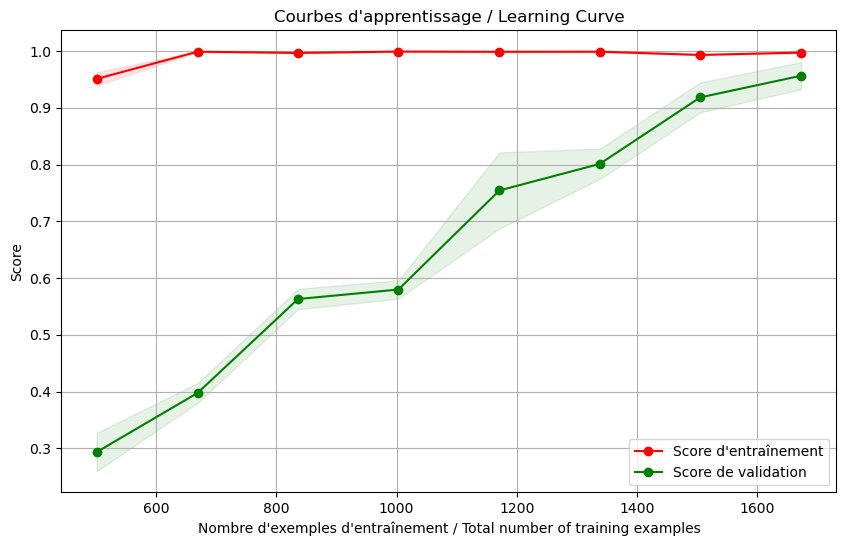

In [26]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    model, X_vectorized, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Score d'entraînement")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Score de validation")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

plt.title("Courbes d'apprentissage / Learning Curve")
plt.xlabel("Nombre d'exemples d'entraînement / Total number of training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

model = LogisticRegression(max_iter=1000)

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_vectorized, y)

print("Meilleur paramètre C trouvé / Best C parameter found :", grid_search.best_params_)

cv_scores = grid_search.best_score_
print("Meilleur score de validation croisée / Best cross-validation score found:", cv_scores)

Meilleur paramètre C trouvé: {'C': 10}
Meilleur score de validation croisée: 0.9617670233296411


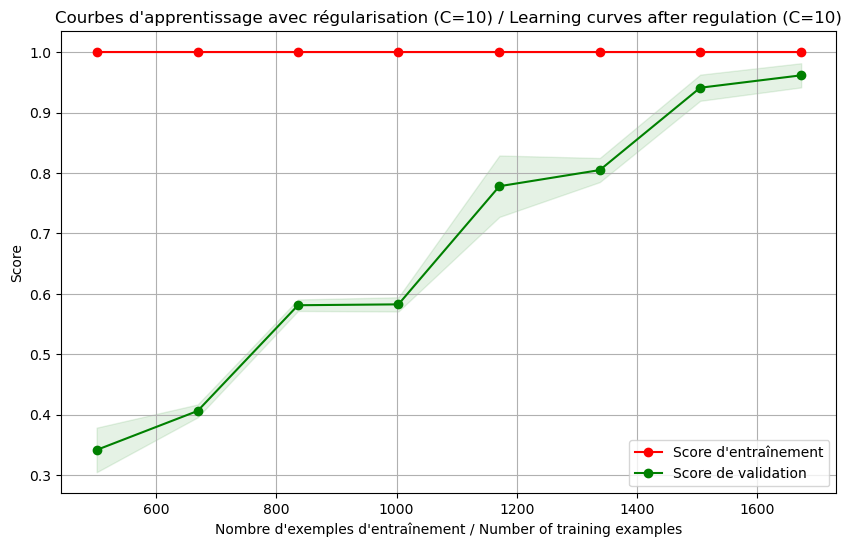

In [27]:
model_regd = LogisticRegression(C=10, max_iter=1000)

train_sizes, train_scores, test_scores = learning_curve(model_regd, X_vectorized, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Score d'entraînement")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Score de validation")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

plt.title("Courbes d'apprentissage avec régularisation (C=10) / Learning curves after regulation (C=10)")
plt.xlabel("Nombre d'exemples d'entraînement / Number of training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

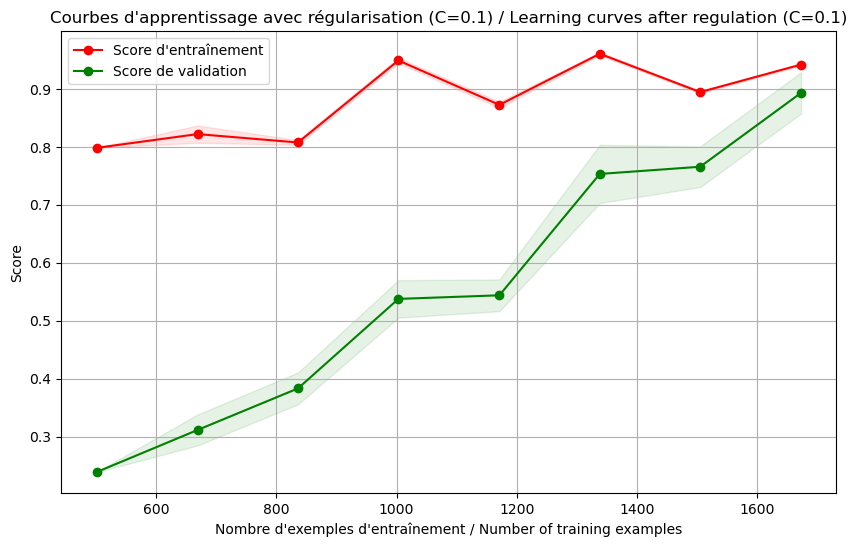

In [29]:
stronger_reg_model = LogisticRegression(C=0.1, max_iter=1000)

stronger_reg_model.fit(X_vectorized, y)

train_sizes, train_scores, test_scores = learning_curve(stronger_reg_model, X_vectorized, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Score d'entraînement")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Score de validation")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

plt.title("Courbes d'apprentissage avec régularisation (C=0.1) / Learning curves after regulation (C=0.1)")
plt.xlabel("Nombre d'exemples d'entraînement / Number of training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()